In [1]:
import pandas as pd
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
%matplotlib inline

- Reading data from a csv file

In [2]:
df = pd.read_csv('./Labs/muon_271119/Run0/ch1_values.csv', header=None)
time_per_event_in_s= 1.9980000000000002e-05 
timestep_in_s = 2e-08
timesteps_in_s = np.arange(0,time_per_event_in_s,timestep_in_s)

- Assign dataframe's values to an array, flatten it and invert it ( for a single event)

In [37]:
temp = df.values
x = temp[1].flatten()
x *= -1.0

- Define a smoothing function using numpys convolve and smooth data

In [38]:
def smooth(x,window_len=11,window='hanning'):
    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError( "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y


In [39]:
smoothed_data = smooth(x, window_len=51, window='bartlett')
smoothed_data.size

1050

- Plot raw and smoothed data

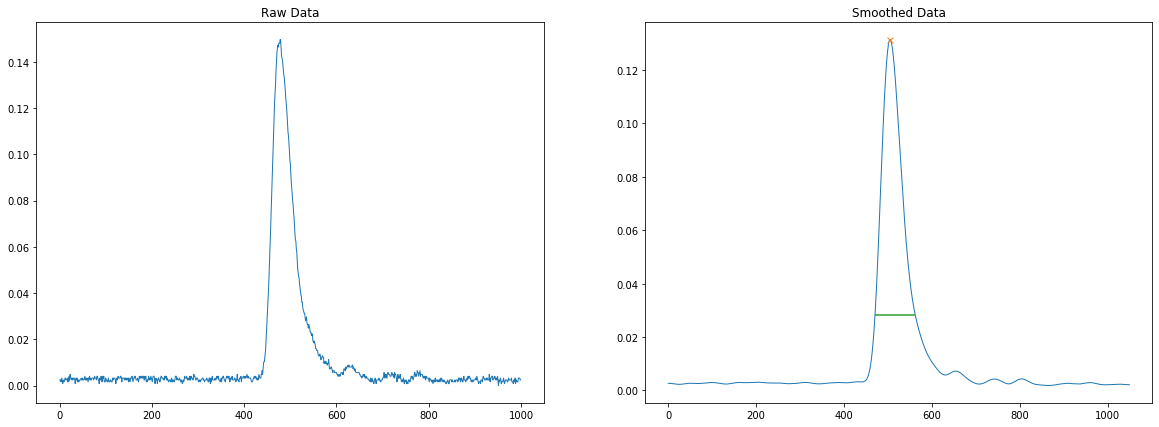

In [40]:
plt.figure(figsize=(20,7))
plt.subplot(121)
plt.plot(x,'-', lw=1)
plt.title("Raw Data")
plt.subplot(122)
peaks, properties = signal.find_peaks(smoothed_data, height=0.2*smoothed_data.max())
results_w = signal.peak_widths(smoothed_data, peaks, rel_height=0.8)
plt.plot(smoothed_data,'-', lw=1)
# plt.axis([0,1000,0,1.7])
plt.plot(peaks, smoothed_data[peaks], "x")
plt.hlines(*results_w[1:], color="C2")
plt.title("Smoothed Data")
plt.show()

In [41]:
print('Peaks width: {wd}'.format(wd = results_w[1:][0] ))
for i in range(results_w[1:][0].size):
     print('Found peak with range: {rr}'.format(rr = results_w[1:][i+1]))

Peaks width: [0.02810701]
Found peak with range: [470.29336406]


In [42]:
print("Found peak at index {t} with amplitude: {amp}".format(t=peaks,amp=smoothed_data[peaks]))

Found peak at index [505] with amplitude: [0.13140608]


In [43]:
# from scipy.stats import norm
# from scipy.special import erf
# from scipy.optimize import curve_fit


# def fitter(x, mean, sigma, a, b):
#     xi = ( x - mean ) / sigma
#     alpha = ( a - mean ) / sigma
#     beta = ( b - mean ) / sigma
#     def Phi(x):
#         return 1 / 2 * ( 1 + erf( x / np.sqrt(2) ) ) 
#     Zeta = Phi(beta) - Phi(alpha)
#     return norm.cdf(x) / ( Zeta * sigma)

# def func(x, mean, sigma):
#     return np.exp(-(x - mean)**2/(2*sigma**2))/(sigma * np.sqrt(2*np.pi))

# x = results_w[1:][1]
# y = results_w[1:][0]
# param_bounds=([-np.inf,0,-np.inf],[np.inf,0.2,np.inf])
# popt, pcov = curve_fit(func, x, y)

- Choose a range of interest from smoothed data

Here we choose points with amplitude bigger that 0.1 of the peak

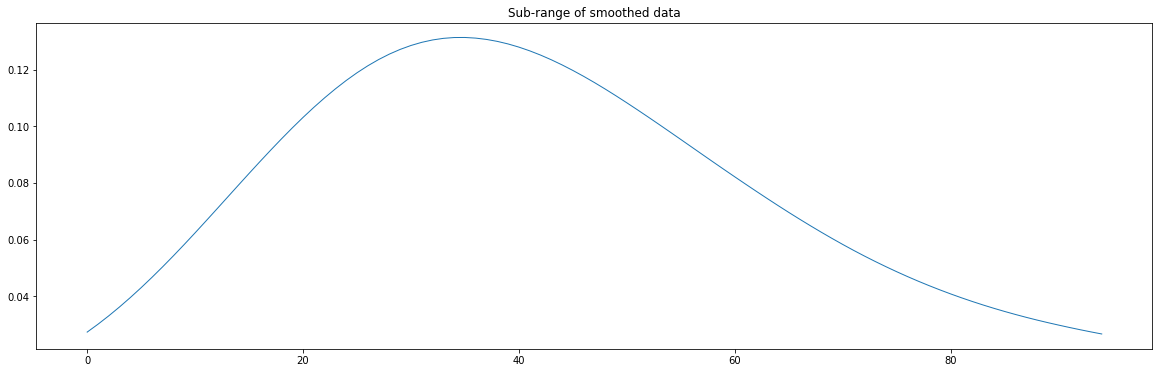

In [44]:
ranged_sm_data = smoothed_data[smoothed_data>=0.2*smoothed_data[peaks].max()]
plt.figure(figsize=(20,6))
plt.plot(ranged_sm_data,'-', lw=1)
plt.title("Sub-range of smoothed data")
plt.show()

- Append indices of the subrange to a list

In [45]:

dataa = np.concatenate((smoothed_data[0:1000][:,np.newaxis], timesteps_in_s[:,np.newaxis]), axis=1)

temp_indices = []
for m in ranged_sm_data:
    temp_indices.append(np.where( m == dataa[:,0:1]) )
    
indices = []
for i in range(len(temp_indices)):
    indices.append(temp_indices[i][0][0])


In [46]:
# for i in range(len(temp_indices)):
#     print(temp_indices[i][0][0])

In [47]:
timesteps_in_s[indices].size

95

In [48]:
smoothed_data[0:1000][indices].size

95

In [49]:
ranged_sm_data.size

95